In [1]:
import numpy as np
import matplotlib.pyplot as plt
from graspy.inference import SemiparametricTest
from graspy.embed import AdjacencySpectralEmbed
import seaborn as sns
import warnings
from graspy.simulations import binary_sbm, rdpg
from graspy.utils import symmetrize
import time
import pandas as pd

warnings.filterwarnings("ignore")
FONTSIZE = 30

def double_plot(A, X):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    sns.heatmap(A, ax=ax[0], xticklabels=False, yticklabels=False, cbar=False, cmap='Blues')
    sns.scatterplot(X[:,1], X[:,2], ax=ax[1],alpha = 0.5,s=100)
    ax[1].get_xaxis().set_visible(False)
    ax[1].get_yaxis().set_visible(False)
    ax[0].set_title('Adjacency matrix', fontsize=FONTSIZE)
    ax[1].set_title('Adjacency spectral embedding',fontsize=FONTSIZE)
    return ax


# From *A Semiparametric Two-Sample Hypothesis Testing Problem for Random Graphs* (Tang et al. 2017)

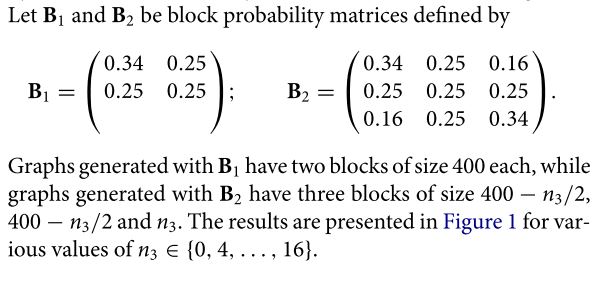

In [3]:
B1 = np.array([[0.34, 0.25],
               [0.25, 0.25]])
B2 = np.array([[0.34, 0.25, 0.16],
               [0.25, 0.25, 0.25],
               [0.16, 0.25, 0.34]])
n1 = 400
n2 = 400

A1 = binary_sbm([n1,n2], B1)
A2 = binary_sbm([n1,n2], B1)

In [6]:
spt = SemiparametricTest(n_bootstraps=50, n_components=6)
%prun spt.fit(A1, A2)

In [11]:
spt.T1_bootstrap

array([7.39980044, 7.31081312])

In [20]:
X1 = AdjacencySpectralEmbed(k=10).fit_transform(A1)

In [24]:
%prun [rdpg(X1) for x in range(0, 100)]

In [2]:
B1 = np.array([[0.34, 0.25],
               [0.25, 0.25]])
B2 = np.array([[0.34, 0.25, 0.16],
               [0.25, 0.25, 0.25],
               [0.16, 0.25, 0.34]])
n1 = 400
n2 = 400
n3s = [0, 4, 8, 12, 16]

bs = 500

n_components = 3 # this should be dimselected, ideally

B1_graphs = []
B2_graphs = []
tests = []
for n3 in n3s:
    A1 = binary_sbm([n1,n2], B1)
    if n3 == 0:
        A2 = binary_sbm([n1,n2], B1)
    else:
        A2 = binary_sbm([(n1 - n3//2), (n2 - n3//2), n3], B2)
        
#     X1 = AdjacencySpectralEmbed(k=10).fit_transform(A1)
#     X2 = AdjacencySpectralEmbed(k=10).fit_transform(A2)
#     double_plot(A1,X1)
#     X2df = pd.DataFrame(X2)
#     sns.pairplot(X2df)
#     #double_plot(A2,X2)
    
#     t = time.process_time()
#     spt = SemiparametricTest(n_bootstraps=bs, n_components=n_components)
#     spt.fit(A1, A2)
#     print('{0:.3f} mins'.format(((time.process_time() - t)/60)))
#     B1_graphs.append(A1)
#     B2_graphs.append(A2)
#     tests.append(spt)
    

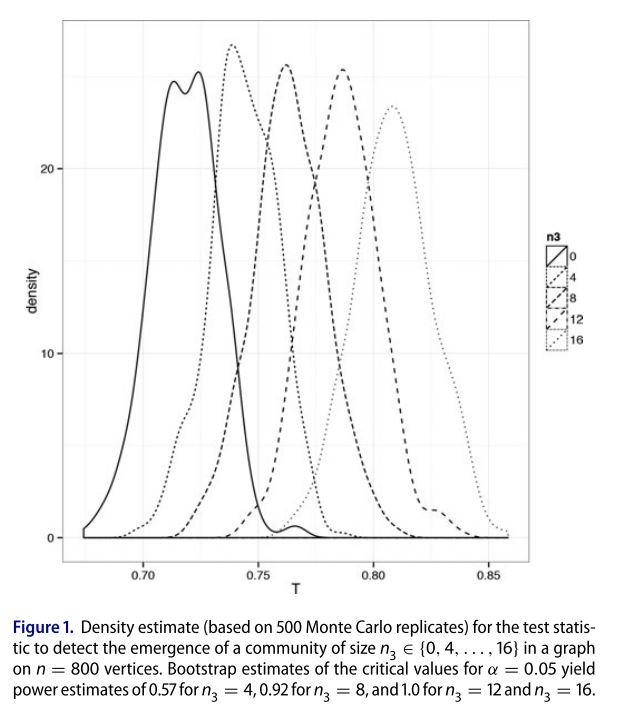

n3 = 0
p = 0.001
sample T statistic = 14.964367551692888

n3 = 4
p = 0.001
sample T statistic = 14.772474314149337

n3 = 8
p = 0.001
sample T statistic = 14.602885412440859

n3 = 12
p = 0.001
sample T statistic = 14.68606941500242

n3 = 16
p = 0.001
sample T statistic = 14.52656453390828



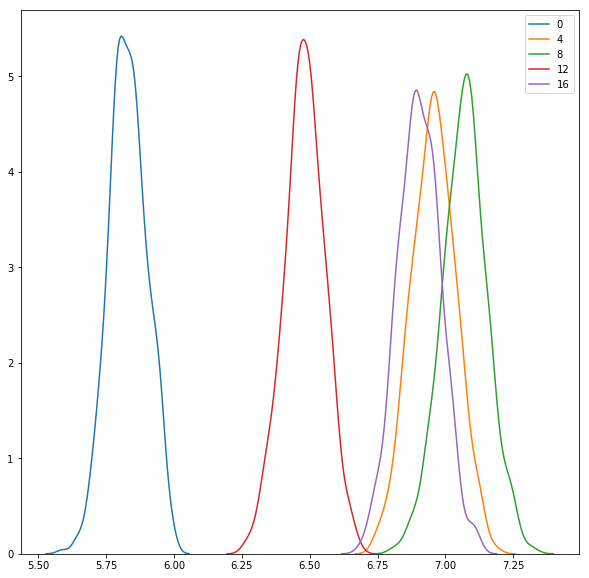

In [29]:
ax = plt.subplots(1,1,figsize=(10,10))[1]
for idx, spt in enumerate(tests):
    print('n3 = {}'.format(n3s[idx]))
    print('p = {}'.format(spt.p))
    print('sample T statistic = {}'.format(spt.T_sample))
    print('')
    sns.distplot(spt.T2_bootstrap, ax=ax, hist=False, norm_hist=True, label=str(n3s[idx]))
plt.legend()
plt.show()